The dataset is comprised of tab-separated files with phrases from the Rotten Tomatoes dataset. 

train.tsv contains the phrases and their associated sentiment labels.

The sentiment labels are:

0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive

In [1]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt

%matplotlib inline

## Read the data and load it as a dataframe in the variable "dataset" ; Note: File is "tab" seperated ( 1 mark )

In [2]:
dataset = pd.read_csv('train.tsv', sep='\t')

## Print the dataframe ( 1 mark )

In [3]:
dataset.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2

## Print the distribution of the Sentiment ( 1 mark )

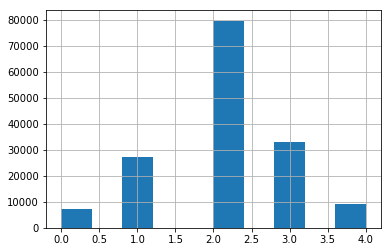

In [4]:
dataset.Sentiment.hist()

In [5]:
import seaborn as sns

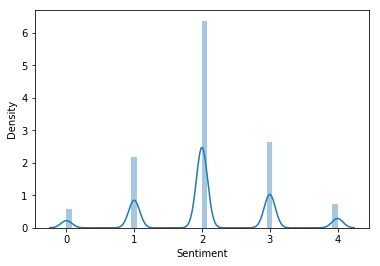

In [6]:
sns.distplot(dataset.Sentiment)

Text(0.5,1,'number of Average Phrases are for sentiment')

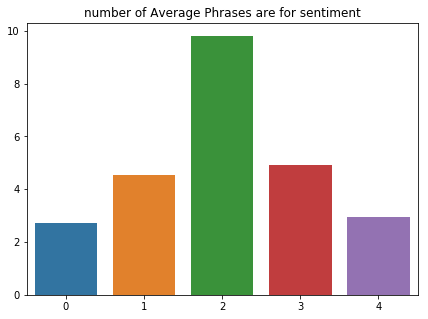

In [7]:
# Mean value of pharases
plt.figure(figsize=(7,5))
means_phrase=[]
sentiment=[]
for i in dataset.Sentiment.unique():
    sentiment.append(i)
    means_phrase.append(dataset.loc[dataset.Sentiment==i]["SentenceId"].value_counts().mean())
    
sns.barplot(sentiment,means_phrase)
plt.title("number of Average Phrases are for sentiment")

In [8]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(dataset['Phrase'])

In [9]:
type(text_counts)

scipy.sparse.csr.csr_matrix

In [10]:
X = pd.DataFrame(text_counts.toarray())
y = dataset.Sentiment

In [11]:
from sklearn.model_selection import train_test_split

## Divide the data into train and test in the ratio 80 and 20 respectively. ( 1 mark )

In [12]:
# text_counts would be used as x ( features ) and data["Sentiment"] as y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(124848, 14988) (31212, 14988)
(124848,) (31212,)


## Train Multinomial Naive Bayes Classification model using Sklearn ( 2 marks )

In [13]:
from sklearn.naive_bayes import MultinomialNB

In [14]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

## Calculate the Test Accuracy , Precision , Recall , Confusion Matrix on test data ( 4 marks, each cary 1 mark )

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [16]:
predictions = classifier.predict(X_test)

In [17]:
print('Accuracy:',format(accuracy_score(y_test, predictions)*100))
print('Classification_report:',classification_report(y_test, predictions))

Accuracy: 60.94771241830066
Classification_report:               precision    recall  f1-score   support

           0       0.44      0.27      0.34      1414
           1       0.49      0.42      0.45      5455
           2       0.69      0.79      0.73     15917
           3       0.52      0.50      0.51      6585
           4       0.48      0.30      0.37      1841

    accuracy                           0.61     31212
   macro avg       0.52      0.46      0.48     31212
weighted avg       0.59      0.61      0.60     31212



In [18]:
#let us get the predictions using the classifier we had fit above
y_pred = classifier.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[  388,   665,   319,    37,     5],
       [  357,  2288,  2484,   301,    25],
       [  132,  1440, 12503,  1697,   145],
       [    9,   227,  2626,  3293,   430],
       [    3,    32,   269,   986,   551]])

In [19]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted    0     1      2     3     4    All
True                                          
0          388   665    319    37     5   1414
1          357  2288   2484   301    25   5455
2          132  1440  12503  1697   145  15917
3            9   227   2626  3293   430   6585
4            3    32    269   986   551   1841
All        889  4652  18201  6314  1156  31212

## Predict the class for the sentence : "I ate pizza last night at dominos which was very healthy and tasty" ( 2 marks )

In [20]:
corpus = ["I ate pizza last night at dominos which was very healthy and tasty"]

In [21]:
res = cv.transform(corpus)

In [22]:
res.shape

(1, 14988)

In [23]:
classifier.predict(res)

array([3])